In [118]:
!pip install torchvision

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root = 'C/Users/Hp/Desktop',train = True, download = True, transform = transform)

In [4]:
test_data = datasets.MNIST(root = 'C/Users/Hp/Desktop',train = False, download = True, transform = transform)

In [10]:
print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: C/Users/Hp/Desktop
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: C/Users/Hp/Desktop
    Split: Test
    StandardTransform
Transform: ToTensor()


In [17]:
print(train_data[2])


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [18]:
image = train_data[0][0]

In [23]:
image.shape

torch.Size([1, 28, 28])

In [24]:
image.reshape(28,28).shape

torch.Size([28, 28])

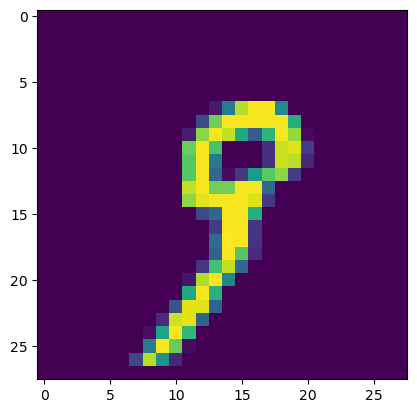

In [36]:
plt.imshow(image.reshape((28,28)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


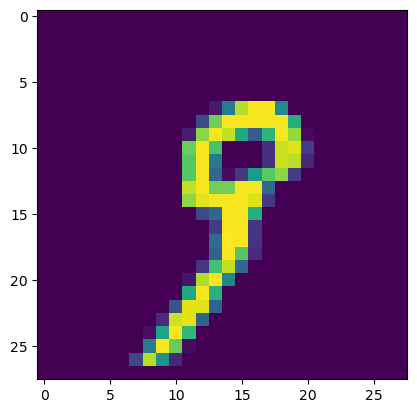

In [39]:
i = 0
while i < 20:
    print(i)
    image = train_data[i][0]
    plt.imshow(image.reshape(28,28))
    
    i+=1

In [51]:
class MultilayerPerceptron(nn.Module):
    def __init__(self,in_size = 28*28, out_sz = 10,layer = [120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_size,layer[0])
        self.fc2 = nn.Linear(layer[0],layer[1])
        self.fc3 = nn.Linear(layer[1],out_sz)

    def forward(self,X):
        X = f.relu(self.fc1(X))
        X = f.relu(self.fc2(X))
        X = self.fc3(X)
        return f.log_softmax(X,dim=1)

In [52]:
torch.manual_seed(101)
model = MultilayerPerceptron()


In [53]:
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [54]:
for param in model.parameters():
    print(param.numel())
    

94080
120
10080
84
840
10


In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)


In [62]:
train_loader = DataLoader(train_data,batch_size = 100,shuffle = True)

In [64]:
train_loader

In [66]:
# for b, (X_train,y_train) in enumerate(train_loader):
#     print(b, X_train)

In [69]:
# import time
# strat_time = time.time()

epochs = 10

train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred,y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            accuracy = trn_corr.item()*100/(100*b)
            print(f"epoch {i} batch {b} loss : {loss.item()} accuracy : {accuracy}")

    train_loss.append(loss)
    train_correct.append(trn_corr)


epoch 0 batch 200 loss : 0.25511395931243896 accuracy : 93.495
epoch 0 batch 400 loss : 0.258078932762146 accuracy : 93.9575
epoch 0 batch 600 loss : 0.16647720336914062 accuracy : 94.41333333333333
epoch 1 batch 200 loss : 0.07393044233322144 accuracy : 95.87
epoch 1 batch 400 loss : 0.20237207412719727 accuracy : 96.11
epoch 1 batch 600 loss : 0.1251940131187439 accuracy : 96.27333333333333
epoch 2 batch 200 loss : 0.14292463660240173 accuracy : 97.285
epoch 2 batch 400 loss : 0.06194828823208809 accuracy : 97.155
epoch 2 batch 600 loss : 0.07983198761940002 accuracy : 97.21666666666667
epoch 3 batch 200 loss : 0.0425674170255661 accuracy : 97.85
epoch 3 batch 400 loss : 0.08462385088205338 accuracy : 97.835
epoch 3 batch 600 loss : 0.07582779228687286 accuracy : 97.83
epoch 4 batch 200 loss : 0.14243005216121674 accuracy : 98.27
epoch 4 batch 400 loss : 0.042632490396499634 accuracy : 98.2125
epoch 4 batch 600 loss : 0.059559665620326996 accuracy : 98.21666666666667
epoch 5 batch 20

In [71]:
train_loss

[tensor(0.1665, grad_fn=<NllLossBackward0>),
 tensor(0.1252, grad_fn=<NllLossBackward0>),
 tensor(0.0798, grad_fn=<NllLossBackward0>),
 tensor(0.0758, grad_fn=<NllLossBackward0>),
 tensor(0.0596, grad_fn=<NllLossBackward0>),
 tensor(0.0883, grad_fn=<NllLossBackward0>),
 tensor(0.0176, grad_fn=<NllLossBackward0>),
 tensor(0.0029, grad_fn=<NllLossBackward0>),
 tensor(0.0500, grad_fn=<NllLossBackward0>),
 tensor(0.0360, grad_fn=<NllLossBackward0>)]

In [ ]:
############################ Using CNN #########################

In [5]:
train_loader = DataLoader(train_data,batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data,batch_size = 10, shuffle = True)

In [16]:
train_data[0][1]

5

In [17]:
for i, (X_train,y_train) in enumerate(train_data):
    break

In [23]:
X_train.shape
# y_train

torch.Size([1, 28, 28])

In [24]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [28]:
conv1 = nn.Conv2d(1,6,3,1) # 1 color channel, 6 filters (output), 3*3 kernel, 1 stride

conv2 = nn.Conv2d(6,16,3,1)  # 6 input filters, 16 filters (output), 3*3 kernel, 1 stride


In [29]:
X = X_train

In [32]:
X.shape

torch.Size([1, 28, 28])

In [34]:
X = f.relu(conv1(X))

In [37]:
X.shape  # as we didn't add padding so 28 dim data got reduced to 26 dim data

torch.Size([6, 26, 26])

In [41]:
X = f.max_pool2d(X,2,2)

In [42]:
X.shape

torch.Size([6, 13, 13])

In [43]:
X = f.relu(conv2(X))

In [44]:
X.shape

torch.Size([16, 11, 11])

In [48]:
X.view(-1,16*11*11)

tensor([[0.0454, 0.0677, 0.0374,  ..., 0.0531, 0.0224, 0.0224]],
       grad_fn=<ViewBackward0>)

In [72]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,X):
        X = f.relu(self.conv1(X))
        X = f.max_pool2d(X,2,2)
        X = f.relu(self.conv2(X))
        X = f.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5)
        X = f.relu(self.fc1(X))
        X = f.relu(self.fc2(X))
        X = self.fc3(X)
        return f.log_softmax(X,dim=1)


In [73]:
torch.manual_seed(42)
model = CNN()

In [74]:
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [75]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [78]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [83]:
epochs = 5
train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(X_train)
        loss = criterion(y_pred,y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr+=batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600 == 0:
            print(f"epoch {i}, batch {b}, loss {loss.item()}")
    train_loss.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val,y_test)
    test_loss.append(loss)
    test_correct.append(tst_corr)
        
        
        

epoch 0, batch 600, loss 0.0026317816227674484
epoch 0, batch 1200, loss 0.0002142844896297902
epoch 0, batch 1800, loss 0.0019635085482150316
epoch 0, batch 2400, loss 0.1291920244693756
epoch 0, batch 3000, loss 0.013532432727515697
epoch 0, batch 3600, loss 0.06485597044229507
epoch 0, batch 4200, loss 0.3032057285308838
epoch 0, batch 4800, loss 1.0427677631378174
epoch 0, batch 5400, loss 0.11905913054943085
epoch 0, batch 6000, loss 1.2740905284881592
epoch 1, batch 600, loss 0.0028069601394236088
epoch 1, batch 1200, loss 0.005194474942982197
epoch 1, batch 1800, loss 0.01788903772830963
epoch 1, batch 2400, loss 0.015342334285378456
epoch 1, batch 3000, loss 0.12456619739532471
epoch 1, batch 3600, loss 0.02276105433702469
epoch 1, batch 4200, loss 0.008074574172496796
epoch 1, batch 4800, loss 0.013065782375633717
epoch 1, batch 5400, loss 0.025682732462882996
epoch 1, batch 6000, loss 0.0051724473014473915
epoch 2, batch 600, loss 0.18443426489830017
epoch 2, batch 1200, loss

In [91]:
train_loss

[tensor(1.2741, grad_fn=<NllLossBackward0>),
 tensor(0.0052, grad_fn=<NllLossBackward0>),
 tensor(0.0937, grad_fn=<NllLossBackward0>),
 tensor(0.0035, grad_fn=<NllLossBackward0>),
 tensor(0.1116, grad_fn=<NllLossBackward0>)]

In [95]:
loss_train = []
loss_test = []
for i in train_loss:
    loss_train.append(i.detach().numpy())
for i in test_loss:
    loss_test.append(i.detach().numpy())


In [92]:
loss_train

[array(1.2740905, dtype=float32),
 array(0.00517245, dtype=float32),
 array(0.09369215, dtype=float32),
 array(0.00346177, dtype=float32),
 array(0.11163183, dtype=float32)]

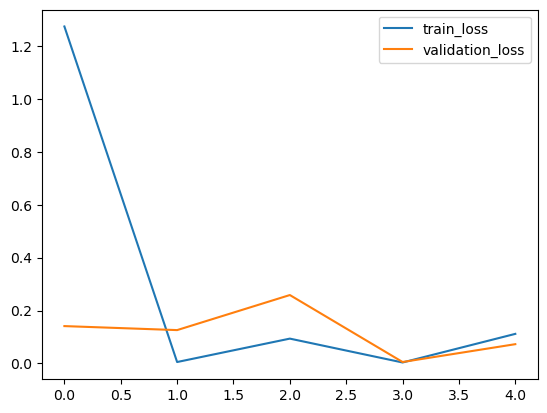

In [99]:
plt.plot(loss_train,label = 'train_loss')
plt.plot(loss_test,label = 'validation_loss')
plt.legend()

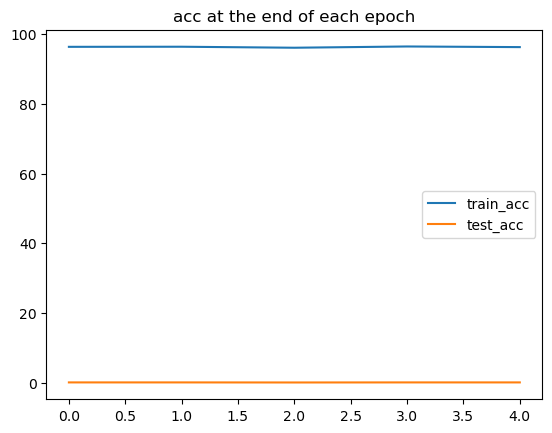

In [102]:
plt.plot([t/600 for t in train_correct],label = 'train_acc')
plt.plot([t/100 for t in test_correct],label = 'test_acc')
plt.title("acc at the end of each epoch")
plt.legend()

In [103]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle = False)

In [104]:
with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [105]:
correct.item()/len(test_data)

0.9647

In [109]:
print(np.arange(10).reshape(1,10))
print()

print(confusion_matrix(predicted.view(-1),y_test.view(-1)))

[[0 1 2 3 4 5 6 7 8 9]]

[[ 961    0    1    0    1    2    6    0    2    1]
 [   0 1114    0    0    0    0    3    5    0    2]
 [   5    1  999    0    1    0    0    5    4    0]
 [   2    2    9  984    0   17    0   10    8    1]
 [   0    0    1    0  936    1    2    2    0    9]
 [   1    2    0   14    0  847   10    0   13   10]
 [   3    0    2    0    8    2  924    0    3    0]
 [   1    2   11    3    8    0    0  996    7   10]
 [   7   14    9    8    8   14   13    3  929   19]
 [   0    0    0    1   20    9    0    7    8  957]]


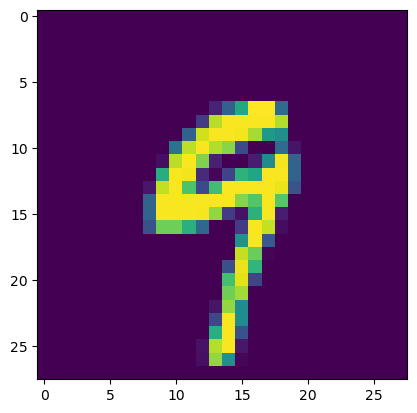

In [110]:
plt.imshow(test_data[2019][0].reshape(28,28))

In [111]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2019][0].view(1,1,28,28))

In [112]:
new_prediction

tensor([[-1.2212e+01, -1.1371e+01, -1.6774e+01, -8.0830e+00, -6.4227e+00,
         -1.0399e+01, -7.2296e+01, -8.2698e+00, -5.5682e+00, -6.0722e-03]])

In [114]:
new_prediction.argmax()

tensor(9)

In [116]:
#######################################################################################################
############################################## CIFAR 10 ###############################################

In [122]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
transfor = transforms.ToTensor()

In [125]:
train_data = datasets.CIFAR10(root = 'C/Users/HP/Desktop',train = True, download = True, transform = transform)

100%|██████████| 170498071/170498071 [00:32<00:00, 5264394.63it/s] 


Extracting C/Users/HP/Desktop\cifar-10-python.tar.gz to C/Users/HP/Desktop


In [126]:
test_data = datasets.CIFAR10(root = 'C/Users/HP/Desktop',train = False,download = True, transform = transforms)

Files already downloaded and verified


In [127]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C/Users/HP/Desktop
    Split: Train
    StandardTransform
Transform: ToTensor()

In [128]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: C/Users/HP/Desktop
    Split: Test
    StandardTransform
Transform: <module 'torchvision.transforms' from 'C:\\Users\\Hp\\anaconda3\\Lib\\site-packages\\torchvision\\transforms\\__init__.py'>

In [154]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [156]:
type(test_loader)

torch.utils.data.dataloader.DataLoader

In [140]:
class_names = ['plane','car','bird','cat','deer','frog','horse','boat','truck']

In [141]:
for images, labels in train_loader:
    break

In [134]:
labels

tensor([6, 0, 4, 1, 2, 7, 9, 4, 7, 8])

In [136]:
im = make_grid(images,nrow = 5)

[6 0 4 1 2 7 9 4 7 8]


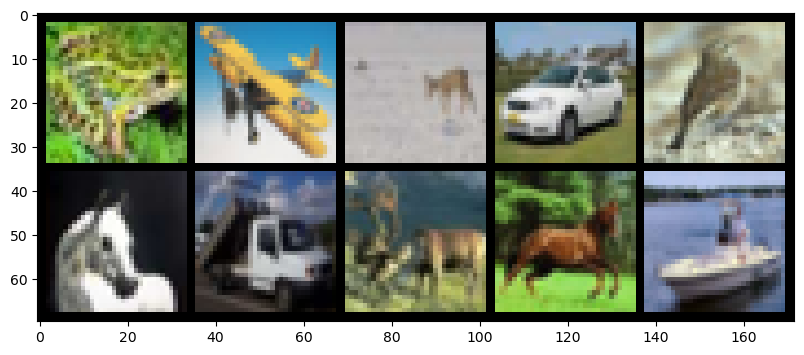

In [139]:
print(labels.numpy())
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [145]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(6*6*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,X):
        X = f.relu(self.conv1(X))
        X = f.max_pool2d(X,2,2)
        X = f.relu(self.conv2(X))
        X = f.max_pool2d(X,2,2)
        X = X.view(-1,6*6*16)
        X = f.relu(self.fc1(X))
        X = f.relu(self.fc2(X))
        X = self.fc3(X)
        return f.log_softmax(X,dim = 1)
        

In [146]:
torch.manual_seed(42)

model = CNN()
model

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [147]:
for param in model.parameters():
    print(param.numel())

450
6
864
16
69120
120
10080
84
840
10


In [148]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [157]:
epochs = 5
train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(X_train)
        loss = criterion(y_pred,y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr+=batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600 == 0:
            print(f"epoch: {i}, batch: {b}, loss: {loss.item()}, accuracy: {trn_corr.item()*100/(10*b) }%")
            
    train_loss.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(train_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val,y_test)
    test_loss.append(loss)
    test_correct.append(tst_corr)
        
        
        

epoch: 0, batch: 600, loss: 0.6560162305831909, accuracy: 56.733333333333334%
epoch: 0, batch: 1200, loss: 0.9473303556442261, accuracy: 56.891666666666666%
epoch: 0, batch: 1800, loss: 0.9063202142715454, accuracy: 57.105555555555554%
epoch: 0, batch: 2400, loss: 0.9677666425704956, accuracy: 57.65416666666667%
epoch: 0, batch: 3000, loss: 0.5979726314544678, accuracy: 57.8%
epoch: 0, batch: 3600, loss: 1.111924409866333, accuracy: 58.025%
epoch: 0, batch: 4200, loss: 1.0154008865356445, accuracy: 58.00476190476191%
epoch: 0, batch: 4800, loss: 1.0467967987060547, accuracy: 58.202083333333334%
epoch: 1, batch: 600, loss: 1.4803037643432617, accuracy: 61.833333333333336%
epoch: 1, batch: 1200, loss: 0.8386931419372559, accuracy: 61.725%
epoch: 1, batch: 1800, loss: 0.9617608785629272, accuracy: 61.477777777777774%
epoch: 1, batch: 2400, loss: 1.4519643783569336, accuracy: 61.175%
epoch: 1, batch: 3000, loss: 1.1664149761199951, accuracy: 61.04333333333334%
epoch: 1, batch: 3600, loss: 

In [158]:
loss_train = []
loss_test = []
for i in train_loss:
    loss_train.append(i.detach().numpy())
for i in test_loss:
    loss_test.append(i.detach().numpy())


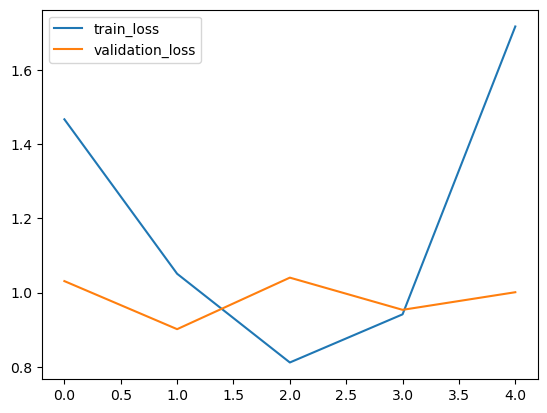

In [159]:
plt.plot(loss_train,label = 'train_loss')
plt.plot(loss_test,label = 'validation_loss')
plt.legend()